In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

def parse_spx_options_data(filename='/kaggle/input/q1-january-european-option-data/spx_eod_202301.txt'):
    """
    Parse SPX European options data from text file into a pandas DataFrame.
    
    Parameters:
    -----------
    filename : str
        Path to the text file containing SPX options data
        
    Returns:
    --------
    pd.DataFrame
        Parsed options data with proper column names and data types
    """
    
    # Define column names based on the header
    columns = [
        'QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
        'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE',
        'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME',
        'C_LAST', 'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE',
        'P_BID', 'P_ASK', 'P_SIZE', 'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA',
        'P_THETA', 'P_RHO', 'P_IV', 'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT'
    ]
    
    # Read the file, skipping the header row
    df = pd.read_csv(
        filename,
        skiprows=1,  # Skip the header row
        names=columns,
        skipinitialspace=True
    )
    
    # Convert numeric columns, handling empty strings
    numeric_cols = [
        'QUOTE_UNIXTIME', 'QUOTE_TIME_HOURS', 'UNDERLYING_LAST', 'EXPIRE_UNIX', 'DTE',
        'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME',
        'C_LAST', 'C_BID', 'C_ASK', 'STRIKE',
        'P_BID', 'P_ASK', 'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA',
        'P_THETA', 'P_RHO', 'P_IV', 'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT'
    ]
    
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert date columns to datetime
    df['QUOTE_READTIME'] = pd.to_datetime(df['QUOTE_READTIME'], errors='coerce')
    df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'], errors='coerce')
    df['EXPIRE_DATE'] = pd.to_datetime(df['EXPIRE_DATE'], errors='coerce')
    
    # Convert Unix timestamps to datetime if needed
    df['QUOTE_DATETIME'] = pd.to_datetime(df['QUOTE_UNIXTIME'], unit='s', errors='coerce')
    df['EXPIRE_DATETIME'] = pd.to_datetime(df['EXPIRE_UNIX'], unit='s', errors='coerce')
    
    return df


def get_data_summary(df):
    """
    Generate a summary of the parsed options data.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Parsed options DataFrame
        
    Returns:
    --------
    dict
        Summary statistics and information
    """
    summary = {
        'total_rows': len(df),
        'date_range': (df['QUOTE_DATE'].min(), df['QUOTE_DATE'].max()),
        'unique_dates': df['QUOTE_DATE'].nunique(),
        'unique_strikes': df['STRIKE'].nunique(),
        'strike_range': (df['STRIKE'].min(), df['STRIKE'].max()),
        'underlying_range': (df['UNDERLYING_LAST'].min(), df['UNDERLYING_LAST'].max()),
        'missing_values': df.isnull().sum().sum()
    }
    return summary


# Main execution
if __name__ == "__main__":
    # Parse the data
    print("Parsing SPX options data...")
    df = parse_spx_options_data('/kaggle/input/q1-january-european-option-data/spx_eod_202301.txt')
    
    print(f"\nData loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    print("\n" + "="*80)
    print("DATA SUMMARY")
    print("="*80)
    summary = get_data_summary(df)
    for key, value in summary.items():
        print(f"{key}: {value}")
    
    print("\n" + "="*80)
    print("COLUMN DATA TYPES")
    print("="*80)
    print(df.dtypes)
    
    print("\n" + "="*80)
    print("BASIC STATISTICS")
    print("="*80)
    print(df.describe())
    
    # Save to CSV for further analysis
    output_file = 'spx_options_parsed.csv'
    df.to_csv(output_file, index=False)
    print(f"\n✓ Data saved to {output_file}")
    
    # Example: Filter for calls with high delta
    print("\n" + "="*80)
    print("EXAMPLE ANALYSIS: Calls with Delta > 0.9")
    print("="*80)
    high_delta_calls = df[df['C_DELTA'] > 0.9]
    print(high_delta_calls[['QUOTE_DATE', 'STRIKE', 'UNDERLYING_LAST', 'C_DELTA', 'C_LAST']].head(10))

Parsing SPX options data...

Data loaded successfully!
Shape: (143907, 35)

First few rows:
   QUOTE_UNIXTIME      QUOTE_READTIME QUOTE_DATE  QUOTE_TIME_HOURS  \
0      1672866000 2023-01-04 16:00:00 2023-01-04              16.0   
1      1672866000 2023-01-04 16:00:00 2023-01-04              16.0   
2      1672866000 2023-01-04 16:00:00 2023-01-04              16.0   
3      1672866000 2023-01-04 16:00:00 2023-01-04              16.0   
4      1672866000 2023-01-04 16:00:00 2023-01-04              16.0   

   UNDERLYING_LAST EXPIRE_DATE  EXPIRE_UNIX  DTE  C_DELTA  C_GAMMA  ...  \
0          3853.39  2023-01-04   1672866000  0.0      1.0      0.0  ...   
1          3853.39  2023-01-04   1672866000  0.0      1.0      0.0  ...   
2          3853.39  2023-01-04   1672866000  0.0      1.0      0.0  ...   
3          3853.39  2023-01-04   1672866000  0.0      1.0      0.0  ...   
4          3853.39  2023-01-04   1672866000  0.0      1.0      0.0  ...   

   P_GAMMA   P_VEGA  P_THETA    P_RH

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


       QUOTE_UNIXTIME                 QUOTE_READTIME  \
count    1.439070e+05                         143907   
mean     1.674023e+09  2023-01-18 01:27:24.387000064   
min      1.672866e+09            2023-01-04 16:00:00   
25%      1.673384e+09            2023-01-10 16:00:00   
50%      1.674076e+09            2023-01-18 16:00:00   
75%      1.674680e+09            2023-01-25 16:00:00   
max      1.675199e+09            2023-01-31 16:00:00   
std      7.231565e+05                            NaN   

                          QUOTE_DATE  QUOTE_TIME_HOURS  UNDERLYING_LAST  \
count                         143907          143907.0    143907.000000   
mean   2023-01-17 09:27:24.387000064              16.0      3968.014040   
min              2023-01-04 00:00:00              16.0      3808.190000   
25%              2023-01-10 00:00:00              16.0      3899.160000   
50%              2023-01-18 00:00:00              16.0      3982.870000   
75%              2023-01-25 00:00:00         

GENERATING VISUALIZATIONS


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


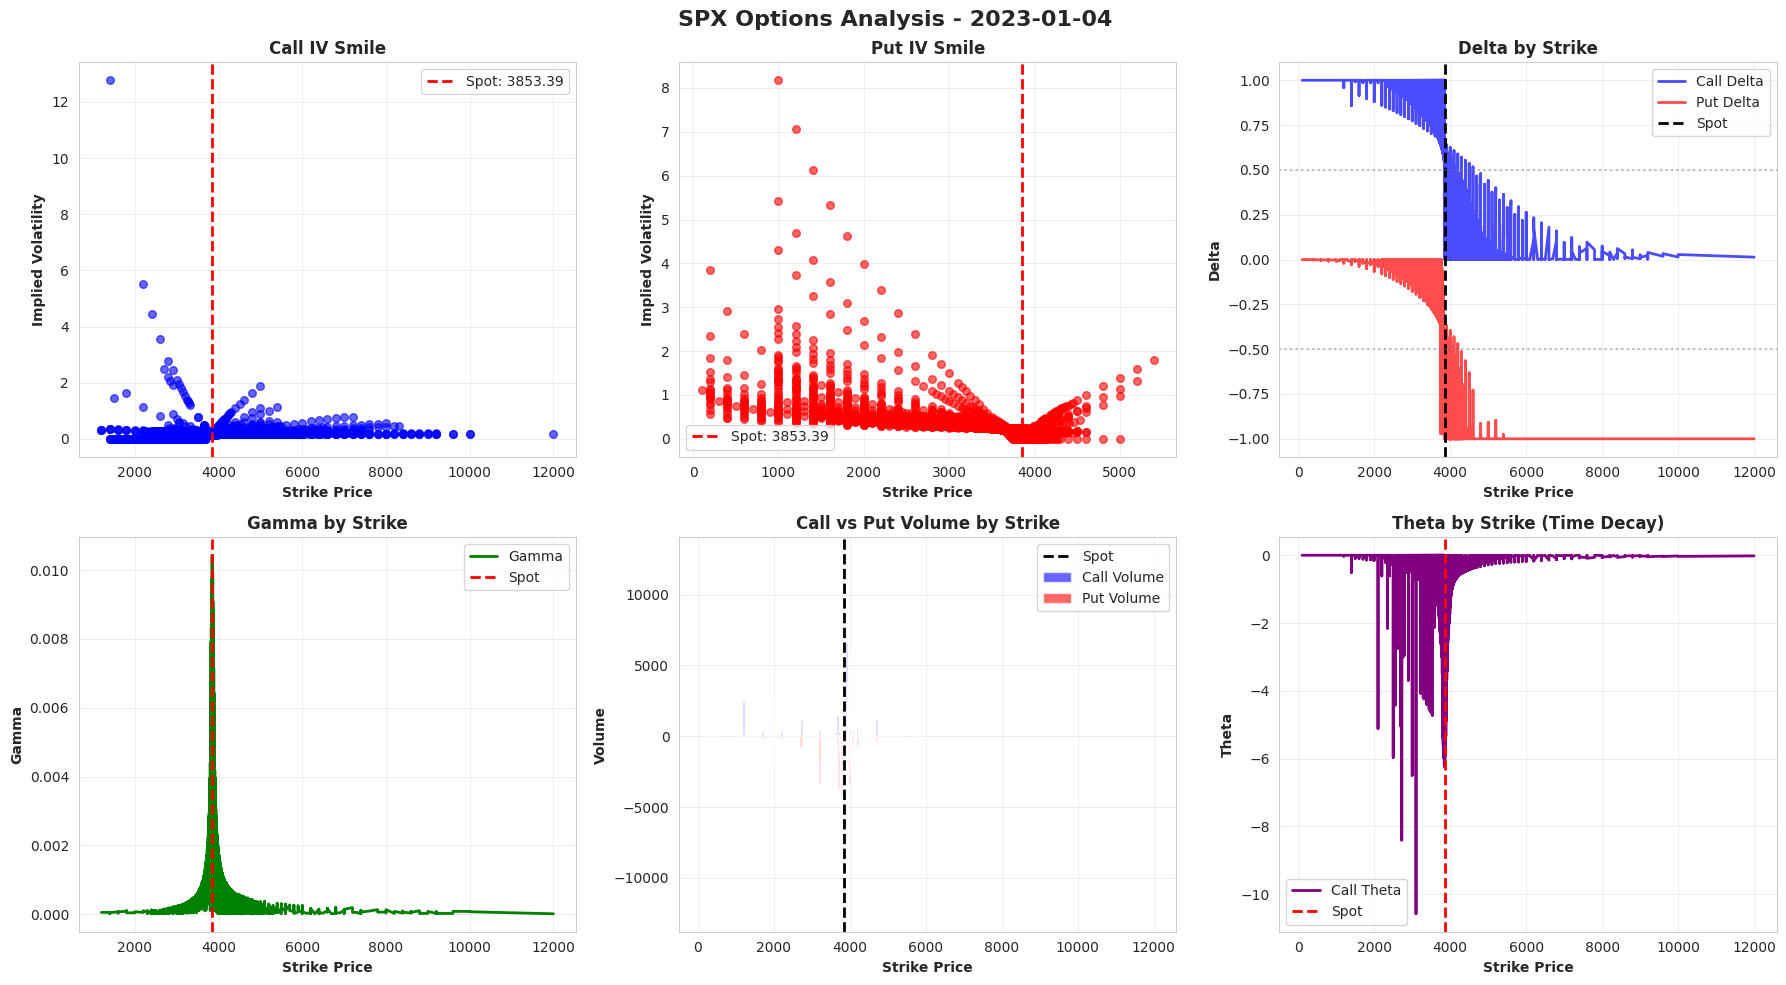


✓ Charts saved to 'spx_options_analysis.png'

Available dates in your dataset:
QUOTE_DATE
2023-01-04    7549
2023-01-05    7559
2023-01-06    7568
2023-01-09    7422
2023-01-10    7471
2023-01-11    7522
2023-01-12    7681
2023-01-13    7676
2023-01-17    7637
2023-01-18    7553
2023-01-19    7636
2023-01-20    7528
2023-01-23    7407
2023-01-24    7602
2023-01-25    7562
2023-01-26    7606
2023-01-27    7663
2023-01-30    7644
2023-01-31    7621
Name: count, dtype: int64

To plot a specific date, run:
plot_options_analysis(df, '2023-01-15')


In [6]:
# ============================================================================
# SPX OPTIONS VISUALIZATION ADD-ON
# Run this cell after loading the data with the parser script
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

def plot_options_analysis(df, sample_date=None):
    """
    Create comprehensive visualizations of SPX options data.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Parsed options DataFrame (from the previous cell)
    sample_date : str or datetime, optional
        Specific date to analyze. If None, uses the first date in the dataset
    """
    
    # Set style
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (16, 12)
    
    # If no date specified, use the first date
    if sample_date is None:
        sample_date = df['QUOTE_DATE'].min()
    
    # Filter data for the sample date
    df_date = df[df['QUOTE_DATE'] == sample_date].copy()
    
    if len(df_date) == 0:
        print(f"No data found for date: {sample_date}")
        return
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'SPX Options Analysis - {sample_date.strftime("%Y-%m-%d")}', 
                 fontsize=16, fontweight='bold')
    
    # 1. Implied Volatility Smile (Calls)
    ax1 = axes[0, 0]
    df_plot = df_date[df_date['C_IV'].notna() & (df_date['C_IV'] > 0)].copy()
    if len(df_plot) > 0:
        df_plot = df_plot.sort_values('STRIKE')
        ax1.scatter(df_plot['STRIKE'], df_plot['C_IV'], alpha=0.6, s=30, c='blue')
        ax1.axvline(df_plot['UNDERLYING_LAST'].iloc[0], color='red', linestyle='--', 
                    label=f'Spot: {df_plot["UNDERLYING_LAST"].iloc[0]:.2f}', linewidth=2)
        ax1.legend()
    ax1.set_xlabel('Strike Price', fontweight='bold')
    ax1.set_ylabel('Implied Volatility', fontweight='bold')
    ax1.set_title('Call IV Smile', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # 2. Implied Volatility Smile (Puts)
    ax2 = axes[0, 1]
    df_plot = df_date[df_date['P_IV'].notna() & (df_date['P_IV'] > 0)].copy()
    if len(df_plot) > 0:
        df_plot = df_plot.sort_values('STRIKE')
        ax2.scatter(df_plot['STRIKE'], df_plot['P_IV'], alpha=0.6, s=30, c='red')
        ax2.axvline(df_plot['UNDERLYING_LAST'].iloc[0], color='red', linestyle='--', 
                    label=f'Spot: {df_plot["UNDERLYING_LAST"].iloc[0]:.2f}', linewidth=2)
        ax2.legend()
    ax2.set_xlabel('Strike Price', fontweight='bold')
    ax2.set_ylabel('Implied Volatility', fontweight='bold')
    ax2.set_title('Put IV Smile', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3. Delta vs Strike
    ax3 = axes[0, 2]
    df_plot = df_date[(df_date['C_DELTA'].notna()) & (df_date['P_DELTA'].notna())].copy()
    if len(df_plot) > 0:
        df_plot = df_plot.sort_values('STRIKE')
        ax3.plot(df_plot['STRIKE'], df_plot['C_DELTA'], 'b-', label='Call Delta', linewidth=2, alpha=0.7)
        ax3.plot(df_plot['STRIKE'], df_plot['P_DELTA'], 'r-', label='Put Delta', linewidth=2, alpha=0.7)
        ax3.axvline(df_plot['UNDERLYING_LAST'].iloc[0], color='black', linestyle='--', 
                    label='Spot', linewidth=2)
        ax3.axhline(0.5, color='gray', linestyle=':', alpha=0.5)
        ax3.axhline(-0.5, color='gray', linestyle=':', alpha=0.5)
        ax3.legend()
    ax3.set_xlabel('Strike Price', fontweight='bold')
    ax3.set_ylabel('Delta', fontweight='bold')
    ax3.set_title('Delta by Strike', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # 4. Gamma by Strike
    ax4 = axes[1, 0]
    df_plot = df_date[df_date['C_GAMMA'].notna() & (df_date['C_GAMMA'] > 0)].copy()
    if len(df_plot) > 0:
        df_plot = df_plot.sort_values('STRIKE')
        ax4.plot(df_plot['STRIKE'], df_plot['C_GAMMA'], 'g-', linewidth=2, label='Gamma')
        ax4.axvline(df_plot['UNDERLYING_LAST'].iloc[0], color='red', linestyle='--', 
                    label='Spot', linewidth=2)
        ax4.legend()
    ax4.set_xlabel('Strike Price', fontweight='bold')
    ax4.set_ylabel('Gamma', fontweight='bold')
    ax4.set_title('Gamma by Strike', fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # 5. Option Volume (Calls vs Puts)
    ax5 = axes[1, 1]
    df_plot = df_date[(df_date['C_VOLUME'].notna()) & (df_date['P_VOLUME'].notna())].copy()
    if len(df_plot) > 0:
        df_plot = df_plot.sort_values('STRIKE')
        width = (df_plot['STRIKE'].max() - df_plot['STRIKE'].min()) / len(df_plot) * 0.8
        ax5.bar(df_plot['STRIKE'], df_plot['C_VOLUME'], width=width, alpha=0.6, 
                label='Call Volume', color='blue')
        ax5.bar(df_plot['STRIKE'], -df_plot['P_VOLUME'], width=width, alpha=0.6, 
                label='Put Volume', color='red')
        ax5.axvline(df_plot['UNDERLYING_LAST'].iloc[0], color='black', linestyle='--', 
                    label='Spot', linewidth=2)
        ax5.legend()
    ax5.set_xlabel('Strike Price', fontweight='bold')
    ax5.set_ylabel('Volume', fontweight='bold')
    ax5.set_title('Call vs Put Volume by Strike', fontweight='bold')
    ax5.grid(True, alpha=0.3)
    
    # 6. Theta by Strike
    ax6 = axes[1, 2]
    df_plot = df_date[df_date['C_THETA'].notna()].copy()
    if len(df_plot) > 0:
        df_plot = df_plot.sort_values('STRIKE')
        ax6.plot(df_plot['STRIKE'], df_plot['C_THETA'], 'purple', linewidth=2, label='Call Theta')
        ax6.axvline(df_plot['UNDERLYING_LAST'].iloc[0], color='red', linestyle='--', 
                    label='Spot', linewidth=2)
        ax6.legend()
    ax6.set_xlabel('Strike Price', fontweight='bold')
    ax6.set_ylabel('Theta', fontweight='bold')
    ax6.set_title('Theta by Strike (Time Decay)', fontweight='bold')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('spx_options_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Charts saved to 'spx_options_analysis.png'")


# ============================================================================
# Run the visualization
# ============================================================================

print("="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# Generate charts for the first date in the dataset
plot_options_analysis(df)

# Show available dates
print("\n" + "="*80)
print("Available dates in your dataset:")
print("="*80)
print(df['QUOTE_DATE'].value_counts().sort_index())

print("\n" + "="*80)
print("To plot a specific date, run:")
print("plot_options_analysis(df, '2023-01-15')")
print("="*80)